TITANIC Dataset

Declare the Basic libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

uploding the titanic dataset into colab notebook

In [3]:
from google.colab import files
data=files.upload()

Saving titanic.csv to titanic.csv


In [4]:
import io
titanic_df = pd.read_csv(io.BytesIO(data['titanic.csv'])) #creating a dataframe as titanic_df

In [5]:
titanic_df.head()     #checking the first five rows from the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


EDA-Exploratory Data Analysis

let begin some exploratory data analysis we'll start by checking missing values

#Missing data

In [8]:
titanic_df.shape    #checking the how many no.of rows and columns are present in this dataset

(418, 12)

so there are totaly 418 rows and 12 columns are present in this dataset

we can use seaborn to create a simple heatmap to see wher we are missing data

In [6]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [7]:
titanic_df.isnull().sum()    #checking the null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

so there are some missing values are present in the age and cabin feild. compare to cabin field the missing values are too high

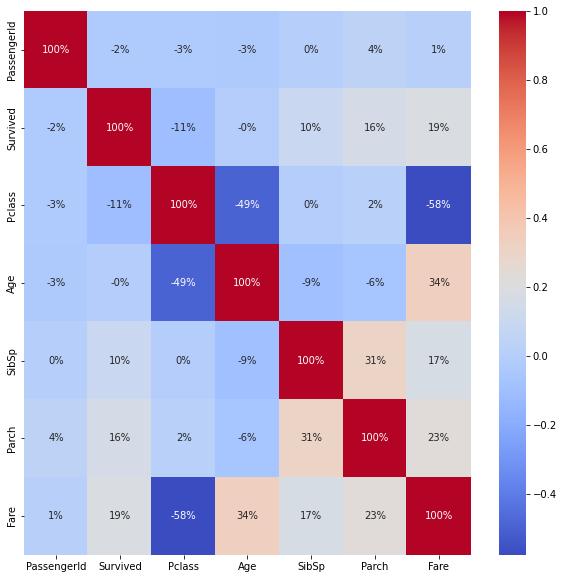

In [9]:
#creating a heatmap to see the correlation between the various features
# heatmap is shows magnitude of a phenomenon as color in two dimensions
plt.figure(figsize=(10,10))
cor = titanic_df.corr()
sns.heatmap(cor,annot = True, cmap="coolwarm", fmt = '.0%' )
plt.show()

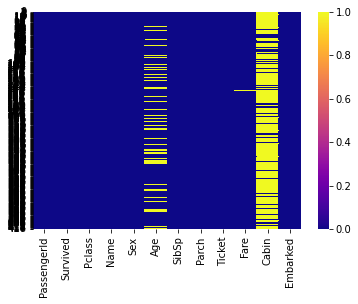

In [10]:
sns.heatmap(titanic_df.isnull(),yticklabels=True,cbar=True,cmap='plasma')    #cmap=color map and cbar=color bar

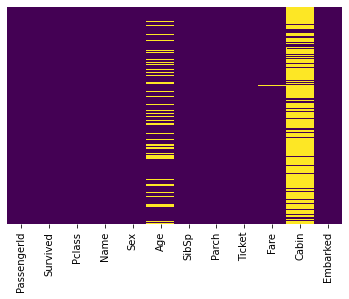

In [11]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')    

lets do some more visulization for this dataset.

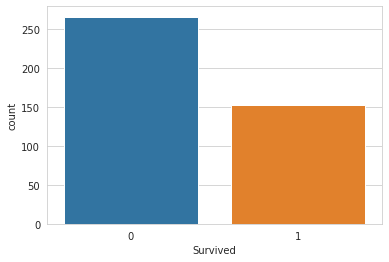

In [12]:
#countplot
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_df)

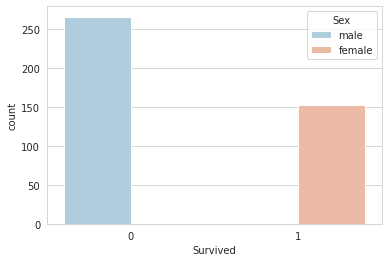

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic_df,palette='RdBu_r')

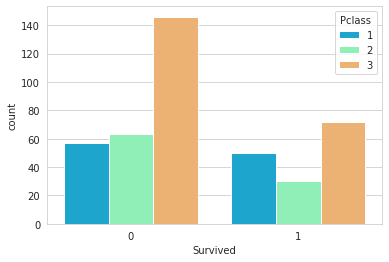

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic_df,palette='rainbow')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


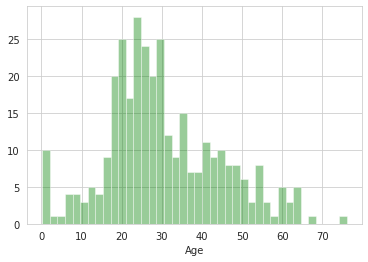

In [15]:
sns.distplot(titanic_df['Age'].dropna(),kde=False,color='green',bins=40)

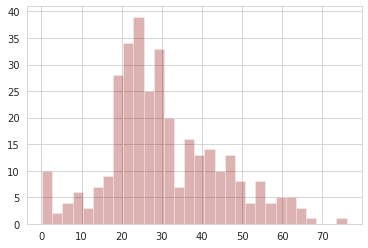

In [16]:
titanic_df['Age'].hist(bins=30,color='darkred',alpha=0.3)

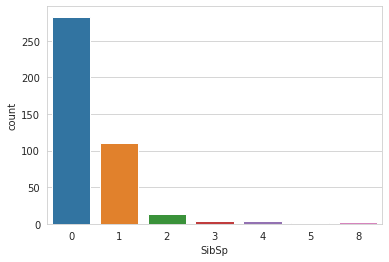

In [17]:
sns.countplot(x='SibSp',data=titanic_df)

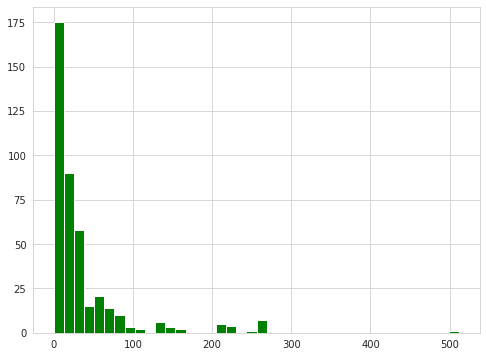

In [18]:
titanic_df['Fare'].hist(color='green',bins=40,figsize=(8,6))

#Data Cleaning

we want to fill in missing age data instead of just dropping the missing age data rows.one way to do this is by filling in the mean age of all the passengers.however we can be smater about this and check the average age by passenger claa for example

#Outlier

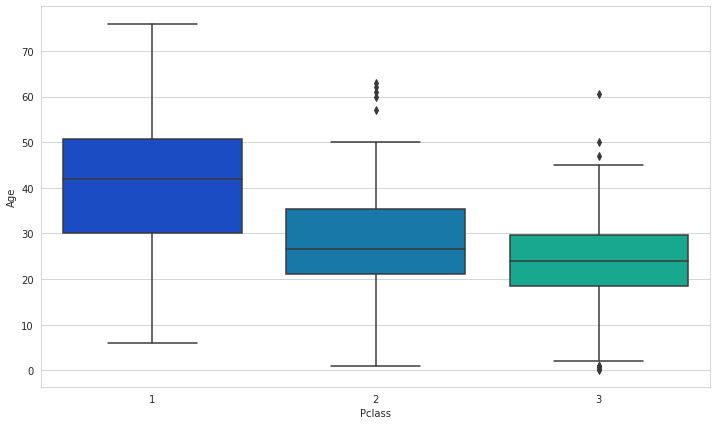

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic_df,palette='winter')

In [20]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
        return 37

    elif Pclass == 2:
        return 29
    else:
      return 24

  else:
    return Age    


In [21]:
titanic_df['Age']=titanic_df[['Age','Pclass']].apply(impute_age,axis=1)

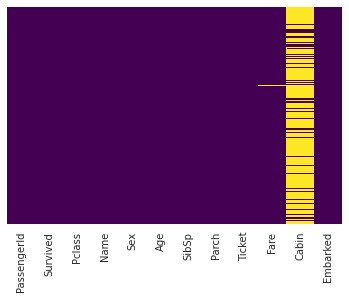

In [22]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')    #cmap=color map and cbar=color bar

so,lets drop the cabin column because its doesnot contain any weight to this model

In [23]:
titanic_df.drop('Cabin',axis=1,inplace=True)

and,lets check the dataset

In [24]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [25]:
titanic_df.dropna(inplace=True)

we'll covert the categorical variable into numeric to creating a dummie variables

In [26]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


so first create a dummie for 'Embarked' column

In [27]:
pd.get_dummies(titanic_df['Embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [28]:
sex = pd.get_dummies(titanic_df['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_df['Embarked'],drop_first=True)

In [29]:
titanic_df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [30]:
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


so,Finally we can use directly this dataset to building models